<span style="font-size:20px">导入数据

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

data = pd.read_csv('/root/autodl-tmp/统计建模/data/newdata.csv')
X = data.drop(columns=['Diagnosis']).values

# 数据预处理（假设X是已经加载的numpy数组）
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# 转换为PyTorch张量
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()

# 创建数据集和数据加载器
batch_size = 256
train_dataset = TensorDataset(X_train, X_train)  # 自编码器目标=输入
test_dataset = TensorDataset(X_test, X_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


<span style="font-size:20px">训练AE latent dim=2 

In [3]:
# 定义自编码器模型（参考文献架构）
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # 编码器：15 -> 2
        self.encoder = nn.Sequential(
            nn.Linear(15, 10),nn.BatchNorm1d(10),nn.ReLU(),
            nn.Linear(10, 5),nn.BatchNorm1d(5), nn.ReLU(),
            nn.Linear(5, 2), nn.BatchNorm1d(2), nn.ReLU(),
            nn.BatchNorm1d(2)
        )
        # 解码器：2 -> 15
        self.decoder = nn.Sequential(
            nn.ReLU(),
            nn.Linear(2, 5),nn.BatchNorm1d(5), nn.ReLU(),
            nn.Linear(5, 10),nn.BatchNorm1d(10),nn.ReLU(),
            nn.Linear(10, 15)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    

# 初始化模型、损失函数和优化器
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()        # 使用均方误差损失[2,4](@ref)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练参数
num_epochs = 50
train_losses = []
test_losses = []

# 训练循环
for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    epoch_train_loss = 0
    for data, _ in train_loader:
        data = data.to(device)
        
        # 前向传播
        outputs = model(data)
        loss = criterion(outputs, data)
        
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item() * data.size(0)
    
    # 记录训练损失
    train_loss = epoch_train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # 验证阶段
    model.eval()
    epoch_test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            outputs = model(data)
            loss = criterion(outputs, data)
            epoch_test_loss += loss.item() * data.size(0)
    
    # 记录验证损失
    test_loss = epoch_test_loss / len(test_loader.dataset)
    test_losses.append(test_loss)
    
    # 打印训练进度
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch [20/50], Train Loss: 0.2771, Test Loss: 0.2862
Epoch [40/50], Train Loss: 0.2719, Test Loss: 0.2725


<span style="font-size:20px"><span style="font-size:20px">训练AE latent dim=4

In [4]:
class Autoencoder2(nn.Module):
    def __init__(self):
        super(Autoencoder2, self).__init__()
        # 编码器：15 -> 4
        self.encoder = nn.Sequential(
            nn.Linear(15, 10),nn.BatchNorm1d(10),nn.ReLU(),
            nn.Linear(10, 4),nn.BatchNorm1d(4), nn.ReLU(),
            nn.BatchNorm1d(4)
        )
        # 解码器：2 -> 15
        self.decoder = nn.Sequential(
            nn.ReLU(),
            nn.Linear(4, 10),nn.BatchNorm1d(10),nn.ReLU(),
            nn.Linear(10, 15)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 初始化模型、损失函数和优化器
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = Autoencoder2().to(device)
criterion = nn.MSELoss()        # 使用均方误差损失[2,4](@ref)
optimizer = optim.Adam(model2.parameters(), lr=0.001)

# 训练参数
num_epochs = 50
train_losses2 = []
test_losses2 = []

# 训练循环
for epoch in range(num_epochs):
    # 训练阶段
    model2.train()
    epoch_train_loss = 0
    for data, _ in train_loader:
        data = data.to(device)
        
        # 前向传播
        outputs = model2(data)
        loss = criterion(outputs, data)
        
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item() * data.size(0)
    
    # 记录训练损失
    train_loss = epoch_train_loss / len(train_loader.dataset)
    train_losses2.append(train_loss)
    
    # 验证阶段
    model2.eval()
    epoch_test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            outputs = model2(data)
            loss = criterion(outputs, data)
            epoch_test_loss += loss.item() * data.size(0)
    
    # 记录验证损失
    test_loss = epoch_test_loss / len(test_loader.dataset)
    test_losses2.append(test_loss)
    
    # 打印训练进度
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch [20/50], Train Loss: 0.1677, Test Loss: 0.1693
Epoch [40/50], Train Loss: 0.1599, Test Loss: 0.1594


<span style="font-size:20px"><span style="font-size:20px">训练AE latent dim=6

In [5]:
class Autoencoder3(nn.Module):
    def __init__(self):
        super(Autoencoder3, self).__init__()
        # 编码器：15 -> 6 
        self.encoder = nn.Sequential(
            nn.Linear(15, 10),nn.BatchNorm1d(10),nn.ReLU(),
            nn.Linear(10, 6),nn.BatchNorm1d(6), nn.ReLU(),
            nn.BatchNorm1d(6)
        )
        # 解码器：6 -> 15
        self.decoder = nn.Sequential(
            nn.ReLU(),
            nn.Linear(6, 10),nn.BatchNorm1d(10),nn.ReLU(),
            nn.Linear(10, 15)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 初始化模型、损失函数和优化器
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model3 = Autoencoder3().to(device)
criterion = nn.MSELoss()        # 使用均方误差损失[2,4](@ref)
optimizer = optim.Adam(model3.parameters(), lr=0.001)

# 训练参数
num_epochs = 50
train_losses3 = []
test_losses3 = []

# 训练循环
for epoch in range(num_epochs):
    # 训练阶段
    model3.train()
    epoch_train_loss = 0
    for data, _ in train_loader:
        data = data.to(device)
        
        # 前向传播
        outputs = model3(data)
        loss = criterion(outputs, data)
        
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item() * data.size(0)
    
    # 记录训练损失
    train_loss = epoch_train_loss / len(train_loader.dataset)
    train_losses3.append(train_loss)
    
    # 验证阶段
    model3.eval()
    epoch_test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            outputs = model3(data)
            loss = criterion(outputs, data)
            epoch_test_loss += loss.item() * data.size(0)
    
    # 记录验证损失
    test_loss = epoch_test_loss / len(test_loader.dataset)
    test_losses3.append(test_loss)
    
    # 打印训练进度
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [20/50], Train Loss: 0.1079, Test Loss: 0.1054
Epoch [40/50], Train Loss: 0.1042, Test Loss: 0.1019


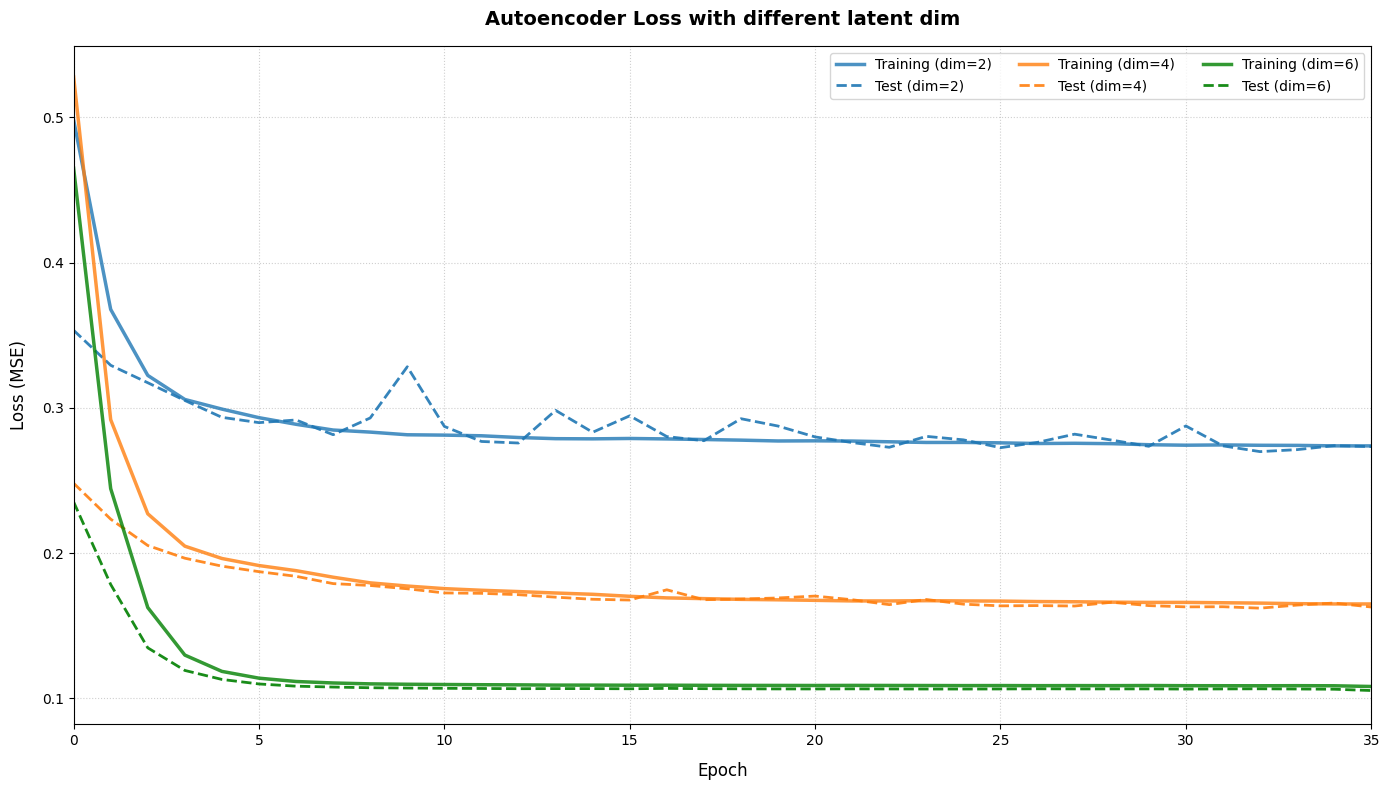

In [8]:
# 平滑处理（保持原有函数不变）
def smooth_curve(losses, alpha=0.2):
    smoothed = [losses[0]]
    for loss in losses[1:]:
        smoothed.append(alpha * smoothed[-1] + (1 - alpha) * loss)
    return smoothed

# 创建画布（单图）
plt.figure(figsize=(14, 8), dpi=100)

# ===== 维度2 =====
# 训练损失（蓝色实线）
smooth_train_2 = smooth_curve(train_losses, alpha=0.2)
plt.plot(smooth_train_2, 
         label='Training (dim=2)', 
         color='#1f77b4',   # 标准蓝
         linewidth=2.5,
         alpha=0.8)

# 测试损失（蓝色虚线）
smooth_test_2 = smooth_curve(test_losses, alpha=0.2)
plt.plot(smooth_test_2,
         label='Test (dim=2)', 
         color='#1f77b4',
         linestyle='--',    # 虚线
         linewidth=2,
         alpha=0.9)

# ===== 维度4 =====
# 训练损失（橙色实线）
smooth_train_4 = smooth_curve(train_losses2, alpha=0.2)
plt.plot(smooth_train_4, 
         label='Training (dim=4)', 
         color='#ff7f0e',  # 标准橙
         linewidth=2.5,
         alpha=0.8)

# 测试损失（橙色虚线）
smooth_test_4 = smooth_curve(test_losses2, alpha=0.2)
plt.plot(smooth_test_4,
         label='Test (dim=4)', 
         color='#ff7f0e',
         linestyle='--',    # 虚线
         linewidth=2,
         alpha=0.9)

# ===== 维度6 =====
# 训练损失（绿色实线）
smooth_train_6 = smooth_curve(train_losses3, alpha=0.2)
plt.plot(smooth_train_6, 
         label='Training (dim=6)', 
         color='green',  
         linewidth=2.5,
         alpha=0.8)

# 测试损失（绿色虚线）
smooth_test_6 = smooth_curve(test_losses3, alpha=0.2)
plt.plot(smooth_test_6,
         label='Test (dim=6)', 
         color='green',
         linestyle='--',    # 虚线
         linewidth=2,
         alpha=0.9)

# ===== 图表美化 =====
# 坐标轴设置
plt.xlabel('Epoch', fontsize=12, labelpad=10)
plt.ylabel('Loss (MSE)', fontsize=12, labelpad=10)
plt.title('Autoencoder Loss with different latent dim', 
          fontsize=14, pad=15, fontweight='bold')

# 范围与刻度
plt.xlim(0, 20)
plt.xticks(np.arange(0, 36, 5))  # 每2个epoch显示刻度

# 图例与网格
plt.legend(loc='upper right', 
           frameon=True,
           fontsize=10,
           ncol=3)  # 双列布局
plt.grid(True, linestyle=':', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()

In [30]:

# 使用完整数据集X构建TensorDataset
full_dataset = TensorDataset(torch.from_numpy(X).float())  # 输入数据无需标签
full_loader = DataLoader(full_dataset, batch_size=256, shuffle=False)  # 关闭shuffle保证样本顺序

model3.eval()
all_reconstruction_errors = []

with torch.no_grad():
    for batch in full_loader:  # 遍历完整数据集
        data = batch[0].to(device)  # 提取无标签数据
        outputs = model3(data)
        # 按样本维度计算MSE[1,6](@ref)
        batch_errors = torch.mean((outputs - data)**2, dim=1)
        all_reconstruction_errors.extend(batch_errors.cpu().numpy())

errors_array = np.array(all_reconstruction_errors)

# 转换为numpy数组并排序
errors_array = np.array(all_reconstruction_errors)
sorted_indices = np.argsort(-errors_array)  # 降序排列索引
sorted_errors = errors_array[sorted_indices]

# 生成样本索引（按误差排序后的顺序）
sample_numbers = np.arange(len(sorted_errors)) + 1



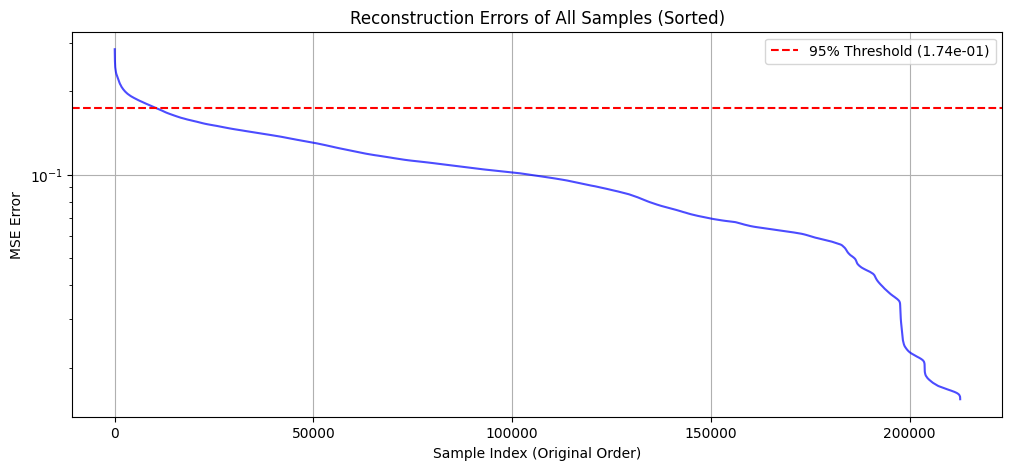

In [35]:
plt.figure(figsize=(12, 5))
plt.plot(sample_numbers[::10], sorted_errors[::10], 'b-', alpha=0.7)

# 自动计算95%分位数阈值
threshold = np.percentile(sorted_errors, 95)
plt.axhline(y=threshold, color='r', linestyle='--', 
           label=f'95% Threshold ({threshold:.2e})')

plt.title('Reconstruction Errors of All Samples (Sorted)')
plt.xlabel('Sample Index (Original Order)')
plt.ylabel('MSE Error')
plt.yscale('log')  # 对数坐标处理长尾分布[3](@ref)
plt.legend()
plt.grid(True)
plt.show()

In [32]:
np.sum(sorted_errors > threshold)

np.int64(10635)

<span style="font-size:20px"><span style="font-size:20px">导出

In [16]:
data = pd.read_csv('/root/autodl-tmp/newdata.csv')
X_tensor = torch.from_numpy(X).float().to(device)
# 获取编码器输出的潜在特征
model.eval()  # 切换为评估模式
with torch.no_grad():
    encoded = model.encoder(X_tensor).cpu().numpy()  # 输出维度为 (n_samples, 2)

# 合并编码结果与诊断标签
result_df = pd.DataFrame(encoded, columns=['Latent1', 'Latent2'])
diagnosis = data['Diagnosis'].values 
result_df['Diagnosis'] = diagnosis  # 添加诊断列
# 保存为CSV文件
result_df.to_csv('data with AE(latent dim=2).csv', index=False)

In [17]:
data = pd.read_csv('/root/autodl-tmp/newdata.csv')
X_tensor = torch.from_numpy(X).float().to(device)
# 获取编码器输出的潜在特征
model2.eval()  # 切换为评估模式
with torch.no_grad():
    encoded = model2.encoder(X_tensor).cpu().numpy()  # 输出维度为 (n_samples, 2)

# 合并编码结果与诊断标签
result_df = pd.DataFrame(encoded, columns=['Latent1', 'Latent2','Latent3','Latent4'])
diagnosis = data['Diagnosis'].values 
result_df['Diagnosis'] = diagnosis  # 添加诊断列
# 保存为CSV文件
result_df.to_csv('data with AE(latent dim=4).csv', index=False)

In [10]:
data = pd.read_csv('/root/autodl-tmp/统计建模/newdata.csv')
X_tensor = torch.from_numpy(X).float().to(device)
# 获取编码器输出的潜在特征
model3.eval()  # 切换为评估模式
with torch.no_grad():
    encoded = model3.encoder(X_tensor).cpu().numpy() 

# 合并编码结果与诊断标签
result_df = pd.DataFrame(encoded, columns=['Latent1', 'Latent2','Latent3','Latent4','Latent5','Latent6'])
diagnosis = data['Diagnosis'].values 
result_df['Diagnosis'] = diagnosis  # 添加诊断列
# 保存为CSV文件
result_df.to_csv('data with AE(latent dim=6).csv', index=False)